
1. Средствами SymPy решите систему из трех дифференциальных
уравнений

 $\frac{dx}{dt} = -2y + x$

 $\frac{dy}{dt} = 5y - 3z$

 $\frac{dz}{dt} = x + 2z$

 с начальными условиями: 𝑥(0) = 1, 𝑦(0) = 0, 𝑧(1) = −1. Постройте графики решений от 𝑡[0,1].

2. Создайте DataFrame с 5 столбцами и 20 строками. Загрузите в него
случайные числа, распределенные по экспоненциальному закону. С помощью
метода descried вычислите DataFrame со статистическими характеристиками.
Извлеките из него 50% квантиль. Вычислите среднее, медиану и среднее
квадратичное отклонение по всему DataFrame.

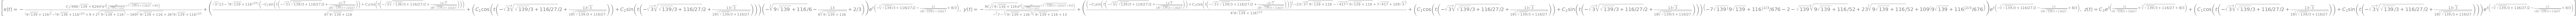

In [2]:
from sympy import init_printing, Eq, dsolve, symbols, Function, lambdify,var
import numpy as np
init_printing()


t = symbols('t')
var('C1 C2 C3')
x = Function('x')(t)
y = Function('y')(t)
z = Function('z')(t)


eq1 = Eq(x.diff(), -2*y + x)
eq2 = Eq(y.diff(), 5*y - 3*z)
eq3 = Eq(z.diff(), x + 2*z)
sol = dsolve([eq1, eq2, eq3])
sol

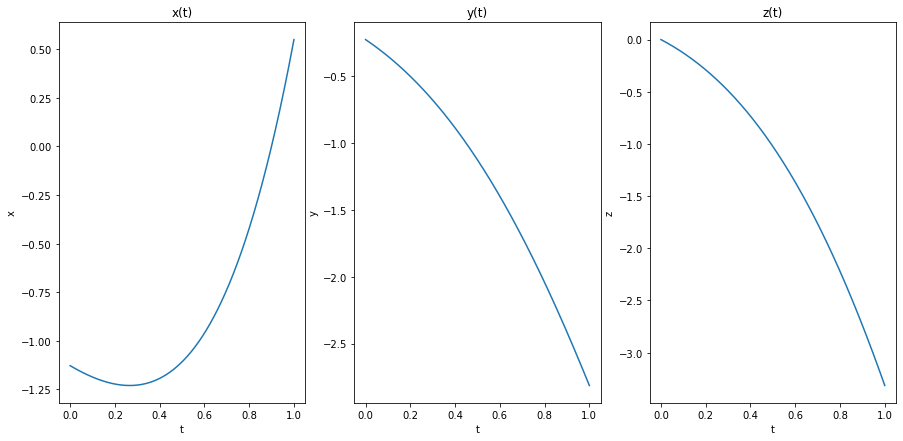

In [14]:
import matplotlib.pyplot as plt 
from sympy import pretty_print

def draw(x, y, z):
    tt = np.linspace(0, 1, 1000)
    xx = lambdify(t, x.rhs, 'numpy')(tt)
    yy = lambdify(t, y.rhs, 'numpy')(tt)
    zz = lambdify(t, z.rhs, 'numpy')(tt)
    fig = plt.figure(figsize=(15,7))
    ax1, ax2, ax3 = fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)
    ax1.set_title('x(t)'), ax2.set_title('y(t)'), ax3.set_title('z(t)')
    ax1.set_xlabel('t'), ax1.set_ylabel('x')
    ax2.set_xlabel('t'), ax2.set_ylabel('y')
    ax3.set_xlabel('t'), ax3.set_ylabel('z')
    ax1.plot(tt, xx)
    ax2.plot(tt, yy)
    ax3.plot(tt, zz)
    plt.show()


    
C3 = 0
C2 = 1
C1 = -C3
xt = sol[0].subs({'C1': C1, 'C2': C2, 'C3': C3}).evalf()
yt = sol[1].subs({'C1': C1, 'C2': C2, 'C3': C3}).evalf()
zt = sol[2].subs({'C1': C1, 'C2': C2, 'C3': C3}).evalf()
draw(xt, yt, zt)


## Задание 2

In [25]:
import pandas as pd


def get_df(m, n):
    matrix = np.random.exponential(scale=1, size=(m, n))
    return pd.DataFrame(matrix)

    
df = get_df(20, 5)
stat_df = df.describe()
stat_df

,0,1,2,3,4
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.886005,1.333033,1.573416,0.720933,0.965553
std,0.853728,0.990180,1.898916,0.540744,0.851023
min,0.035491,0.205963,0.060700,0.069809,0.021097
25%,0.178026,0.653464,0.454436,0.345454,0.253193
50%,0.670581,1.035502,1.074264,0.556647,0.698391
75%,1.159439,1.897416,1.695025,1.058405,1.495146
max,2.767775,3.579654,6.775487,1.898604,2.545711


In [26]:
print('Извлечение 50% квантиля:')
stat_df.loc['50%']

Извлечение 50% квантиля:


0    0.670581
1    1.035502
2    1.074264
3    0.556647
4    0.698391
Name: 50%, dtype: float64

In [27]:
print('Среднее всего dataframe:')
print(df.mean().mean())
print('Медиана всего dataframe:')
print(np.median(df))
print('Среднее квадратичное отклонение всего dataframe:')
print(df.values.std()) 

Среднее всего dataframe:
1.0957880999592735
Медиана всего dataframe:
0.7948154377810714
Среднее квадратичное отклонение всего dataframe:
1.1402757494940083
